In [1]:
import chainer
from chainer import Variable
import pathlib
from discriminator import Discriminator
from generator import Generator
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze data

In [2]:
# built model
# built model
dis = Discriminator()
gen = Generator()

In [4]:
# adapt to gpu
gpu = 0
if gpu >= 0:
    # Make a specified GPU current
    chainer.backends.cuda.get_device_from_id(gpu).use()
    dis.to_gpu()
    gen.to_gpu()
xp = gen.xp
xp

<module 'cupy' from '/home/yohei/.pyenv/versions/miniconda3-latest/envs/chainer/lib/python3.6/site-packages/cupy/__init__.py'>

In [5]:
# path
dir_path = pathlib.Path("result")
dir_path_abs = dir_path.resolve()
gen_paths = []
dis_paths = []
for path in dir_path_abs.glob("gen*.npz"):
    gen_paths.append(path)
for path in dir_path_abs.glob("dis*.npz"):
    dis_paths.append(path)

In [6]:
gen_paths.sort(key=lambda path: int(path.parts[-1].split("_")[-1].split(".")[0]))
dis_paths.sort(key=lambda path: int(path.parts[-1].split("_")[-1].split(".")[0]))
gen_paths, dis_paths

([PosixPath('/home/yohei/Documents/tlab/dcgan.chainer/result/gen_iter_469.npz'),
  PosixPath('/home/yohei/Documents/tlab/dcgan.chainer/result/gen_iter_938.npz'),
  PosixPath('/home/yohei/Documents/tlab/dcgan.chainer/result/gen_iter_1407.npz'),
  PosixPath('/home/yohei/Documents/tlab/dcgan.chainer/result/gen_iter_1875.npz'),
  PosixPath('/home/yohei/Documents/tlab/dcgan.chainer/result/gen_iter_2344.npz'),
  PosixPath('/home/yohei/Documents/tlab/dcgan.chainer/result/gen_iter_2813.npz'),
  PosixPath('/home/yohei/Documents/tlab/dcgan.chainer/result/gen_iter_3282.npz'),
  PosixPath('/home/yohei/Documents/tlab/dcgan.chainer/result/gen_iter_3750.npz'),
  PosixPath('/home/yohei/Documents/tlab/dcgan.chainer/result/gen_iter_4219.npz'),
  PosixPath('/home/yohei/Documents/tlab/dcgan.chainer/result/gen_iter_4688.npz'),
  PosixPath('/home/yohei/Documents/tlab/dcgan.chainer/result/gen_iter_5157.npz'),
  PosixPath('/home/yohei/Documents/tlab/dcgan.chainer/result/gen_iter_5625.npz'),
  PosixPath('/home

In [20]:
logits

variable([[1.6402456 ],
          [0.9894823 ],
          [0.9938124 ],
          [1.6597934 ],
          [1.2075369 ],
          [2.110751  ],
          [1.7545041 ],
          [1.5265739 ],
          [1.9392748 ],
          [1.6403197 ],
          [1.679129  ],
          [1.117827  ],
          [2.0735192 ],
          [2.5433161 ],
          [0.8822955 ],
          [2.3818676 ],
          [0.9472215 ],
          [0.9267794 ],
          [1.6337601 ],
          [1.9410464 ],
          [2.2109916 ],
          [1.7004199 ],
          [1.7488909 ],
          [0.3443774 ],
          [1.6788838 ],
          [2.102133  ],
          [1.0195857 ],
          [1.0818676 ],
          [1.7704432 ],
          [1.6747546 ],
          [2.2367024 ],
          [1.9110962 ],
          [2.1235735 ],
          [2.1028712 ],
          [0.71887904],
          [1.3177829 ],
          [2.2085855 ],
          [1.4704    ],
          [3.0282114 ],
          [2.3565161 ],
          [1.6538134 ],
          [2.449

In [50]:
# calculate accuracy of Discriminator against Generator
n_images = 100
false_acc = {"mean": [], "std": []}
for gen_path, dis_path in zip(gen_paths, dis_paths):
    print("gen:", gen_path.parts[-1], "   dis:", dis_path.parts[-1])
    # load model
    chainer.serializers.load_npz(file=gen_path, obj=gen)
    chainer.serializers.load_npz(file=dis_path, obj=dis)
    acc = []
    for seed in range(10):
        # make noize(code)
        xp.random.seed(seed)
        np.random.seed(seed)
        z = Variable(xp.asarray(gen.make_hidden(n_images)))
        with chainer.using_config('train', False):
            with chainer.using_config('enable_backprop', False):
                x = gen(z)
                logits = dis(x)
        acc.append(len(logits.data[logits.data > 0]) / 100)
    acc = np.array(acc)
    false_acc["mean"].append(acc.mean())
    false_acc["std"].append(acc.std())
    print("False identification rate:{:.5f}".format(false_acc["mean"][-1]))

gen: gen_iter_469.npz    dis: dis_iter_469.npz
False identification rate:0.13700
gen: gen_iter_938.npz    dis: dis_iter_938.npz
False identification rate:0.16500
gen: gen_iter_1407.npz    dis: dis_iter_1407.npz
False identification rate:0.47300
gen: gen_iter_1875.npz    dis: dis_iter_1875.npz
False identification rate:0.00000
gen: gen_iter_2344.npz    dis: dis_iter_2344.npz
False identification rate:0.00000
gen: gen_iter_2813.npz    dis: dis_iter_2813.npz
False identification rate:0.00000
gen: gen_iter_3282.npz    dis: dis_iter_3282.npz
False identification rate:0.99400
gen: gen_iter_3750.npz    dis: dis_iter_3750.npz
False identification rate:0.05100
gen: gen_iter_4219.npz    dis: dis_iter_4219.npz
False identification rate:1.00000
gen: gen_iter_4688.npz    dis: dis_iter_4688.npz
False identification rate:0.34100
gen: gen_iter_5157.npz    dis: dis_iter_5157.npz
False identification rate:1.00000
gen: gen_iter_5625.npz    dis: dis_iter_5625.npz
False identification rate:0.00000
gen: gen

False identification rate:0.00000
gen: gen_iter_46407.npz    dis: dis_iter_46407.npz
False identification rate:0.99400
gen: gen_iter_46875.npz    dis: dis_iter_46875.npz
False identification rate:0.99800


In [51]:
false_acc["mean"] = np.array(false_acc["mean"])
false_acc["std"] = np.array(false_acc["std"])

In [52]:
false_acc

{'mean': array([0.137, 0.165, 0.473, 0.   , 0.   , 0.   , 0.994, 0.051, 1.   ,
        0.341, 1.   , 0.   , 0.015, 1.   , 0.596, 0.999, 0.866, 0.746,
        0.003, 0.   , 0.81 , 0.994, 1.   , 0.989, 0.983, 0.978, 0.   ,
        0.   , 0.943, 0.012, 1.   , 0.   , 0.977, 0.   , 1.   , 0.   ,
        0.   , 0.01 , 0.001, 0.031, 1.   , 0.985, 0.   , 1.   , 0.054,
        0.01 , 0.   , 0.002, 1.   , 0.   , 0.001, 0.995, 0.94 , 0.   ,
        0.001, 0.   , 0.353, 0.999, 0.   , 1.   , 0.   , 1.   , 0.826,
        0.   , 1.   , 0.821, 0.997, 1.   , 0.   , 0.   , 0.95 , 0.   ,
        0.98 , 0.151, 0.255, 0.998, 1.   , 0.285, 0.   , 1.   , 0.   ,
        0.   , 0.001, 0.99 , 1.   , 0.474, 0.   , 0.662, 0.998, 0.001,
        0.983, 0.289, 0.999, 1.   , 0.008, 0.892, 0.   , 0.   , 0.994,
        0.998]),
 'std': array([0.03287856, 0.03232646, 0.03522783, 0.        , 0.        ,
        0.        , 0.008     , 0.017     , 0.        , 0.05717517,
        0.        , 0.        , 0.01627882, 0.     

In [32]:
hoge = false_acc["mean"][[10, 20, 30, 40, 50, 60, 70, 80, 90, 99]]
fuga = false_acc["std"][[10, 20, 30, 40, 50, 60, 70, 80, 90, 99]]

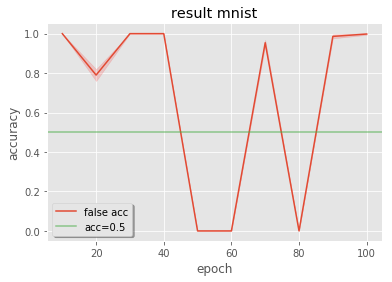

In [47]:
epochs = range(10, 110, 10)
plt.style.use("ggplot")
plt.plot(epochs, hoge, label='false acc')
plt.fill_between(epochs, y1=hoge + fuga, y2=hoge - fuga, alpha=0.15, color="r")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.axhline(y=0.5, color=plt.cm.Set1(2), alpha=0.6, label="acc=0.5")
plt.title("result mnist")
plt.legend(frameon=True, shadow=True)
plt.savefig("result_mnist10.png")

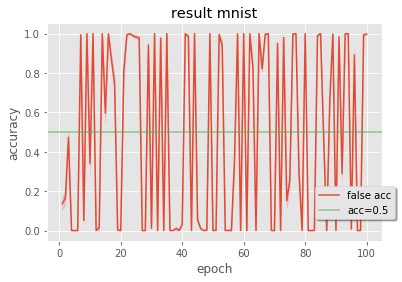

In [56]:
epochs = range(1, 101, 1)
plt.style.use("ggplot")
plt.plot(epochs, false_acc["mean"], label='false acc')
plt.fill_between(
    epochs,
    y1=false_acc["mean"] + false_acc["std"],
    y2=false_acc["mean"] - false_acc["std"], alpha=0.15, color="r")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.axhline(y=0.5, color=plt.cm.Set1(2), alpha=0.6, label="acc=0.5")
plt.title("result mnist")
#plt.ylim(0.0, 1.1)
plt.legend(frameon=True, shadow=True, bbox_to_anchor=(0.8, 0.1), borderaxespad=0)
plt.savefig("result_mnist1.png")